# Project 01 - Color Compression

## Thông tin sinh viên

- Họ và tên: Tôn Thất Minh Quân
- MSSV: 22127349
- Lớp: 22CLC03

## Import các thư viện liên quan

In [66]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

## Helper functions

In [93]:
def read_img(img_path):
    '''
    Read image from img_path

    Parameters
    ----------
    img_path : str
        Path of image

    Returns
    -------
        Image (2D)
    '''

    with Image.open(img_path) as img:
        grayscale_img = img.convert('RGB')
        img_array = np.array(grayscale_img)

    return img_array


def show_img(img_2d):
    '''
    Show image

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)
    '''

    plt.imshow(img_2d, cmap='gray')
    plt.axis('off')  # Hide axis
    plt.show()


def save_img(img_2d, img_path):
    '''
    Save image to img_path

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)
    img_path : str
        Path of image
    '''

    img = Image.fromarray(img_2d)
    img.save(img_path)


def convert_img_to_1d(img_2d):
    '''
    Convert 2D image to 1D image

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)

    Returns
    -------
        Image (1D)
    '''

    height, width, channels = img_2d.shape
    img_1d = img_2d.reshape(height * width, channels)

    return img_1d

def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
    '''
    K-Means algorithm

    Parameters
    ----------
    img_1d : np.ndarray with shape=(height * width, num_channels)
        Original (1D) image
    k_clusters : int
        Number of clusters
    max_iter : int
        Max iterator
    init_centroids : str, default='random'
        The method used to initialize the centroids for K-means clustering
        'random' --> Centroids are initialized with random values between 0 and 255 for each channel
        'in_pixels' --> A random pixel from the original image is selected as a centroid for each cluster

    Returns
    -------
    centroids : np.ndarray with shape=(k_clusters, num_channels)
        Stores the color centroids for each cluster
    labels : np.ndarray with shape=(height * width, )
        Stores the cluster label for each pixel in the image
    '''

    # YOUR CODE HERE
    m, n = img_1d.shape

    centroids = np.zeros((k_clusters, n))

    if(init_centroids == 'in_pixels'):
      for i in range(k_clusters):
          rand_indices = np.random.choice(m, size=10, replace=False)
          centroids[i] = np.mean(img_1d[rand_indices], axis=0)
    else:
      for i in range(k_clusters):
          centroids[i] = np.random.randint(0, 256, size=n, dtype=np.uint8)



    labels = np.zeros(m)
    pre_centroids = centroids.copy()
    times = 0

    while max_iter > 0:

        distances = np.linalg.norm(img_1d[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        if len(np.unique(labels)) < k_clusters:
          centroids = np.zeros((k_clusters, n))

          if(init_centroids == 'in_pixels'):
            for i in range(k_clusters):
                rand_indices = np.random.choice(m, size=10, replace=False)
                centroids[i] = np.mean(img_1d[rand_indices], axis=0)
          else:
            for i in range(k_clusters):
                centroids[i] = np.random.randint(0, 256, size=n, dtype=np.uint8)

          continue

        for k in range(k_clusters):
            cluster_points = img_1d[labels == k]
            if len(cluster_points) > 0:
                centroids[k] = np.mean(cluster_points, axis=0)

        centroid_shift = np.linalg.norm(centroids - pre_centroids, axis=1)
        if np.max(centroid_shift) < 0.1:
            times = times + 1
            if(times > 3):
              break
        else:
            times = 0

        max_iter -= 1
        pre_centroids = centroids.copy()

    return centroids, labels

def generate_2d_img(img_2d_shape, centroids, labels):
    '''
    Generate a 2D image based on K-means cluster centroids

    Parameters
    ----------
    img_2d_shape : tuple (height, width, 3)
        Shape of image
    centroids : np.ndarray with shape=(k_clusters, num_channels)
        Store color centroids
    labels : np.ndarray with shape=(height * width, )
        Store label for pixels (cluster's index on which the pixel belongs)

    Returns
    -------
        New image (2D)
    '''

    # YOUR CODE HERE

    new_img = np.zeros(img_2d_shape, dtype=np.uint8)
    height, width, _ = img_2d_shape
    new_img = centroids[labels].reshape((height, width, 3))

    return new_img


# Your additional functions here
def save_png(img_2d, img_path):
  img = Image.fromarray(img_2d)
  img.save(img_path, "PNG")


## Your tests

Nhap dia chi hinh anh: /content/444455516_122184954722016468_8664257809988741301_n.jpg


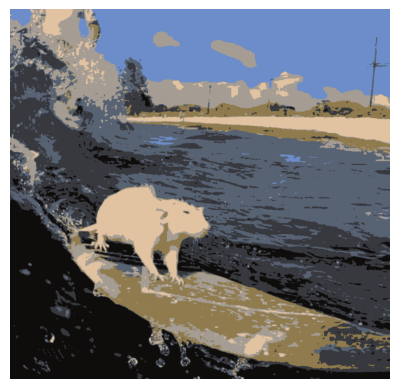

In [90]:
# YOUR CODE HERE
filename = input("Nhap dia chi hinh anh: ")
centroids, labels = kmeans(convert_img_to_1d(read_img(filename)), 7, 100, 'in_pixels')
new_img = generate_2d_img(read_img(filename).shape, np.round(centroids).astype(int), labels)
show_img(new_img)
save_img(new_img.astype(np.uint8), 'newimg.jpg')
save_png(new_img.astype(np.uint8), 'newimg.png')




## Main FUNCTION

In [91]:
# YOUR CODE HERE
def main():
  filename = input("Nhap dia chi hinh anh: ")
  centroids, labels = kmeans(convert_img_to_1d(read_img(filename)), 7, 100, 'in_pixels')
  new_img = generate_2d_img(read_img(filename).shape, np.round(centroids).astype(int), labels)
  show_img(new_img)
  save_img(new_img.astype(np.uint8), 'newimg.jpg')
  save_png(new_img.astype(np.uint8), 'newimg.png')

Nhap dia chi hinh anh: /content/444455516_122184954722016468_8664257809988741301_n.jpg


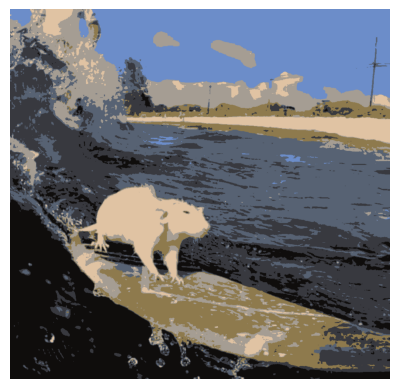

In [94]:
# Call main function
main()